<a href="https://colab.research.google.com/github/TomislavStrugacevac/cifar10-dataset-machine-learning/blob/main/test_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
# need to divide by 255 for each channel so that we get values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
# reminder on how numpy axes work - collapsing order
print('original data:')
print(train_images.shape)
print('vs np.mean - axis 0')
print(np.mean(train_images, axis=(0)).shape)
print('vs np.mean - axis 0,1')
print(np.mean(train_images, axis=(0,1)).shape)
print('vs np.mean - axis 0,1,2')
print(np.mean(train_images, axis=(0,1,2)).shape)
print('vs np.mean - axis 0,1,2,3')
print(np.mean(train_images, axis=(0,1,2,3)).shape)
# print("train labels:")
# print(train_labels)

original data:
(50000, 32, 32, 3)
vs np.mean - axis 0
(32, 32, 3)
vs np.mean - axis 0,1
(32, 3)
vs np.mean - axis 0,1,2
(3,)
vs np.mean - axis 0,1,2,3
()


In [ ]:
# let's normalize the data using mean and standard deviation
mean = np.mean(train_images, axis=(0,1,2,3))
print(mean)
std = np.std(train_images, axis=(0,1,2,3))
print(std)

0.4733649
0.25156906


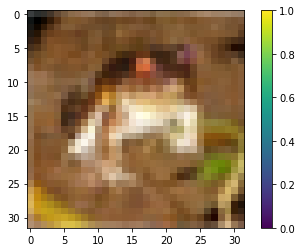

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# build model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),  # images are 32 x 32 pixels size
    tf.keras.layers.Dense(526, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)  # Cifar10 has 10 categories so last layer has 10 nodes
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0013 - accuracy: 0.2712
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7093 - accuracy: 0.3859
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6099 - accuracy: 0.4230
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5453 - accuracy: 0.4457
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4963 - accuracy: 0.4638
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4667 - accuracy: 0.4742
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4360 - accuracy: 0.4832
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4185 - accuracy: 0.4946
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3813 - accuracy: 0.5074
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.360